#### Excercies 11 

Categorical predictors. Using Auto.csv data from previous list create and compare two linear regression models for predicting *mpg*. 

- In the first model use *year* treated as a *continuous variable*. 
- In the second use *year* treated as a *categorical variable*. 

Which model is better? What if there were more than 13 values for variable year? Which model is easier to train? (Hint: seelab2.ipynb notebook mentioned on the lecture.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices

%matplotlib inline

In [2]:
df = pd.read_csv('Auto.csv')
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

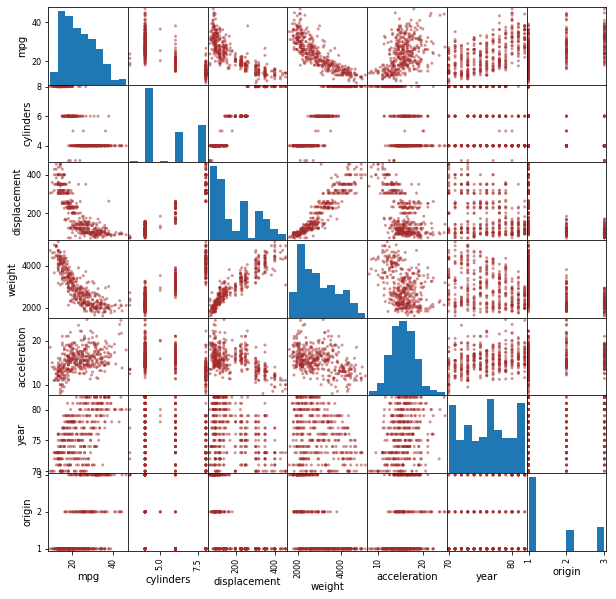

In [3]:
_ = pd.plotting.scatter_matrix(df, color="brown",figsize=(10,10), )

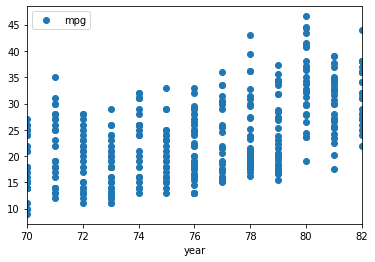

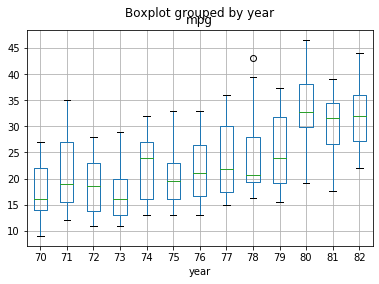

In [4]:
_ = df.plot(x="year", y="mpg", style='o')
_ = df.boxplot(column="mpg", by="year") 

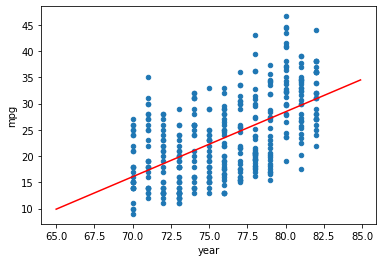

In [5]:
# Linear Regression -> mpg from year, where year is treated as continuous variable.
y, X = dmatrices('mpg ~ year', data=train, return_type='dataframe') 
model = sm.OLS(y, X) 
result_cont = model.fit() 

# scatter-plot data
ax = df.plot(x='year', y='mpg', kind='scatter')

# plot regression line on the same axes
p = result_cont.params
x = np.arange(65, 85, 0.1)
ax = ax.plot(x, p.Intercept + p.year  * x, 'r')

In [6]:
# MSE for regression with year treated as continuous variable.
mpg_true, X = dmatrices('mpg ~ year', data=test, return_type='dataframe') 
mpg_pred = result_cont.predict(X)
metrics.mean_squared_error(mpg_true, mpg_pred)

37.961521412674095

In [7]:
# Linear Regression -> mpg from year, where year is treated as continuous variable.

# copy data
train2 = train.copy()
train2['year'] = train2['year'].astype('category')

# perform linear regression
y, X = dmatrices('mpg ~ year', data=train2, return_type='dataframe') 
model = sm.OLS(y, X) 
result_cat = model.fit() 

In [15]:
# MSE for regression with year treated as continuous variable.
test2 = test.copy()
test2['year'] = test2['year'].astype('category')
mpg_true, X = dmatrices('mpg ~ year', data=test2, return_type='dataframe') 
mpg_pred = result_cat.predict(X)
metrics.mean_squared_error(mpg_true, mpg_pred)

31.051671002684987

In [ ]:
# Which model is better? 
# A: The one with year treated as categorical

# What if there were more than 13 values for variable year? 
# TODO

# Which model is easier to train?
# TODO